In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'forestgreen'
nsc_color = 'dodgerblue'
eco_color = 'rebeccapurple'

In [4]:
df = pd.read_csv("OSA/IncidenceCost.csv")
df.head()

,IncidenceEOS,Cost,Categorical Risk Assessment,NSC,Enhanced Clinical Observation,QALY,Categorical Risk Assessment.1,NSC.1,Enhanced Clinical Observation.1,LY,Categorical Risk Assessment.2,NSC.2,Enhanced Clinical Observation.2,ICER ($/QALY),Categorical Risk Assessment.3,NSC.3,Enhanced Clinical Observation.3
0,0.20,NaN,5188.630895,4439.208023,4477.263190,NaN,30.899493,30.903589,30.904921,NaN,0.999992,0.999992,0.999992,NaN,Strongly Dominated,Baseline,28573.324111
1,0.58,NaN,5367.892386,4618.469514,4656.524681,NaN,30.899015,30.903111,30.904443,NaN,0.999977,0.999977,0.999977,NaN,Strongly Dominated,Baseline,28573.324111
2,0.96,NaN,5547.153878,4797.731006,4835.786173,NaN,30.898537,30.902633,30.903965,NaN,0.999963,0.999963,0.999963,NaN,Strongly Dominated,Baseline,28573.324111
3,1.34,NaN,5726.415369,4976.992497,5015.047664,NaN,30.898059,30.902155,30.903487,NaN,0.999948,0.999948,0.999948,NaN,Strongly Dominated,Baseline,28573.324111
4,1.72,NaN,5905.676861,5156.253989,5194.309156,NaN,30.897581,30.901677,30.903009,NaN,0.999933,0.999933,0.999933,NaN,Strongly Dominated,Baseline,28573.324111


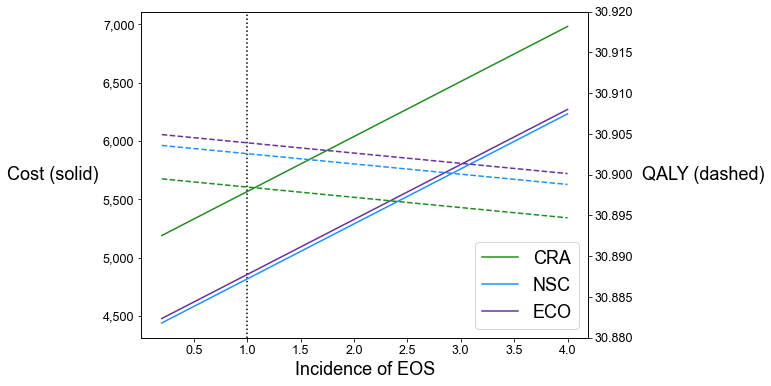

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
plt.axvline(x=1, color='black', linestyle='dotted', label='_Base Case Value')
    
ax2 = ax.twinx()
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(df["IncidenceEOS"], df["Categorical Risk Assessment"], color=cra_color, label="CRA")
ax.plot(df["IncidenceEOS"], df["NSC"], color=nsc_color, label="NSC")
ax.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation"], color=eco_color, label="ECO")
ax.set_xlabel("Incidence of EOS")
ax.set_ylabel("Cost (solid)", rotation=0, labelpad=50, va="center")
ax2.plot(df["IncidenceEOS"], df["Categorical Risk Assessment.1"], color=cra_color, linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["NSC.1"], color=nsc_color, linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation.1"], color=eco_color, linestyle='dashed')
ax2.set_ylabel("QALY (dashed)", rotation=0, labelpad=70, va="center")
ax2.set_ylim(bottom=30.88, top=30.92)
ax.legend(loc='lower right')
plt.show()